In [286]:
xraw = pd.read_csv("X_ANN_dig.csv")

In [287]:
yraw = pd.read_csv("Y_ANN_dig.csv")

In [288]:
from sklearn.model_selection import train_test_split
xt,xtest,yt,ytest=train_test_split(xraw,yraw,test_size=0.2)
print(xtest.shape,yt.shape)
xt = xt.values
xtest=xtest.values

(2000, 4032) (7999, 10)


In [289]:
xtrain = xt.reshape(xt.shape[0],64,63,1).astype('float32')
xtest = xtest.reshape(xtest.shape[0],64,63,1).astype('float32')

In [405]:
model2  = Sequential()
#filter為16, Kernel size為(5,5),Padding為(same)
model2.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(64,63,1), 
                 activation='relu'))

# MaxPooling size為(2,2)
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Drop掉部分神經元避免overfitting
model2.add(Dropout(0.25))

# 平坦化
model2.add(Flatten())
#隱藏層
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = (tf.nn.softmax)))

In [406]:
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 64, 63, 16)        416       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 31, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 31, 36)        14436     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 15, 36)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 15, 36)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8640)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               1106048   
__________

In [407]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [408]:
train_history=model2.fit(x=xtrain, y=yt,validation_split=0.2,
                        epochs=7, batch_size=300,verbose=2)

Train on 6399 samples, validate on 1600 samples
Epoch 1/7
 - 38s - loss: 1.6235 - acc: 0.4434 - val_loss: 0.8552 - val_acc: 0.7381
Epoch 2/7
 - 35s - loss: 0.7556 - acc: 0.7582 - val_loss: 0.3709 - val_acc: 0.8956
Epoch 3/7
 - 39s - loss: 0.3902 - acc: 0.8815 - val_loss: 0.2031 - val_acc: 0.9425
Epoch 4/7
 - 40s - loss: 0.2462 - acc: 0.9272 - val_loss: 0.1418 - val_acc: 0.9606
Epoch 5/7
 - 42s - loss: 0.1797 - acc: 0.9450 - val_loss: 0.1235 - val_acc: 0.9663
Epoch 6/7
 - 41s - loss: 0.1551 - acc: 0.9545 - val_loss: 0.1080 - val_acc: 0.9694
Epoch 7/7
 - 42s - loss: 0.1158 - acc: 0.9652 - val_loss: 0.0944 - val_acc: 0.9750


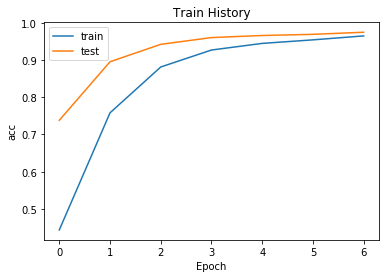

In [409]:
show_train_history('acc','val_acc')

In [294]:
scores = model2.evaluate(xtest , ytest)
scores[1]

2000/2000 [==============================] - 4s 2ms/step


0.9625

In [389]:
ytesttrans=np.zeros(shape=(ytest.shape[0]))
for i in range(0,ytest.shape[0]):
    for j in range(0,10):
        if ytest.iloc[i,j]==1:
            ytesttrans[i]=j
ytesttrans.shape


(2000,)

In [390]:
prediction=model2.predict_classes(xtest)

In [391]:
pd.crosstab(ytesttrans,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0.0,184,0,0,0,0,0,3,1,0,4
1.0,1,213,0,0,0,0,1,1,0,0
2.0,0,0,204,3,1,1,0,0,0,0
3.0,0,0,0,203,0,0,0,0,1,0
4.0,1,1,1,0,192,0,0,0,0,2
5.0,0,0,0,2,1,205,0,0,1,0
6.0,0,0,0,0,1,0,184,0,2,0
7.0,2,1,0,0,0,0,1,185,1,3
8.0,0,0,0,0,0,0,2,0,187,0


In [403]:
df = pd.DataFrame({'label':ytesttrans, 'predict':prediction})
df[(df.label==5)&(df.predict==8)]
li = df[(df.label==7)&(df.predict==0)].index

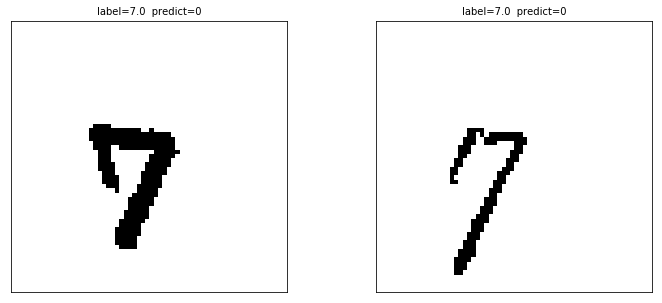

In [404]:
plot_images_labels_prediction2(sam,ytesttrans,prediction,2,li)



In [361]:
from scipy import ndimage
def plot_images_labels_prediction2(images,labels,prediction,num,li):    
    fig = plt.gcf()
    fig.set_size_inches(12, 5)
    if num>25: num=25 
    idx = 0
    for i in range(0, num):
        ax=plt.subplot(1,num, 1+i)
        rotated_img = ndimage.rotate(images[li[idx]], 90)
        ax.imshow(rotated_img, cmap='binary',origin="lower")

        ax.set_title("label=" +str(labels[li[idx]])+
                     "  predict="+str(prediction[li[idx]])
                     ,fontsize=10) 
        idx=idx+1
        
        ax.set_xticks([]);ax.set_yticks([])        
    plt.show()

In [353]:
sam=xtest.reshape(xtest.shape[0],64,63)
sam.shape
li[0]

578

label: 7.0 perdict: 9


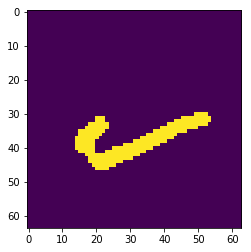

In [334]:
r=560
sm = xtest[r].reshape(64,63)
sm.shape
plt.imshow(sm)
print('label:',ytesttrans[r],'perdict:',prediction[r])

In [272]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
keras.datasets.mnist.load_data();

In [2]:
(x_trainraw,y_trainraw),(x_testraw,y_testraw) = keras.datasets.mnist.load_data();

In [3]:
print(x_trainraw.shape,y_trainraw.shape)
print(x_testraw.shape,y_testraw.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image ,cmap='binary') #顯示形式
    plt.show()
    print(fig)

In [8]:
#處理資料,多加一個顏色維度
x_train = x_trainraw.reshape(x_trainraw.shape[0],28,28,1).astype('float32')
x_test = x_testraw.reshape(x_testraw.shape[0],28,28,1).astype('float32')
# 255-0~1 normalize
x_train =x_train/255
x_test = x_test/255
#y onehot encode
y_train = np_utils.to_categorical(y_trainraw)
y_test = np_utils.to_categorical(y_testraw)



In [9]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [12]:
#最簡單的線性模型(Sequential)，就是一層層往下執行，沒有分叉(If)，也沒有迴圈(loop)，這裡只設一層隱藏層(Dense)

model  = Sequential()
#filter為16, Kernel size為(5,5),Padding為(same）
'''第一個參數濾波器(filters)數目並不是 output 的大小，它是output 的深度(Depth)，而 output 的寬與高會隨著參數設定有所不同，計算公式為 ((W-F+2P)/S)+1，各變數定義如下：
W: input 的寬度
F：濾波器數量
P：補零的策略，卷積層取週邊NxN的滑動視窗時，若超越邊界時，是否要放棄這個點、還是一律補零，若採後者，P就等於1，反之為0。
S：『滑動步長』(Stride)，指滑動視窗時，要一次滑動幾格。
kernal size is the size of filter
'''
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

# MaxPooling size為(2,2)
#padding：補零方式，卷積層取週邊kernel_size的滑動視窗時，若超越邊界時，是否要放棄這個output點(valid)、一律補零(same)、還是不計算超越邊界的Input值(causal)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Drop掉部分神經元避免overfitting,數rate為關掉隱藏層節點的比例，利用隨機關掉隱藏層節點與輸入神經元的連結，不更新權重(W)，造成多個結果，再作比較去除極端值，即可達到避免過度擬合的現象。
model.add(Dropout(0.25))

# 平坦化
model.add(Flatten())
#隱藏層
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = (tf.nn.softmax)))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [14]:
#失函數(crossentropy)及優化方法(adam)及成效衡量方式(accuracy)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history=model.fit(x=x_train, y=y_train,validation_split=0.2,
                        epochs=5, batch_size=300,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 48s - loss: 0.5118 - acc: 0.8392 - val_loss: 0.1085 - val_acc: 0.9683
Epoch 2/5
 - 51s - loss: 0.1408 - acc: 0.9585 - val_loss: 0.0684 - val_acc: 0.9785
Epoch 3/5
 - 53s - loss: 0.0998 - acc: 0.9703 - val_loss: 0.0572 - val_acc: 0.9811
Epoch 4/5
 - 51s - loss: 0.0826 - acc: 0.9746 - val_loss: 0.0440 - val_acc: 0.9870
Epoch 5/5
 - 49s - loss: 0.0684 - acc: 0.9790 - val_loss: 0.0390 - val_acc: 0.9893


In [16]:
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(str(train_acc))
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

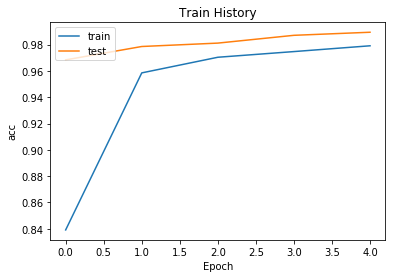

In [17]:
show_train_history('acc','val_acc')

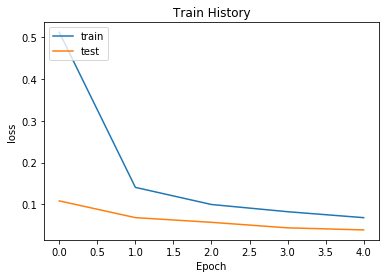

In [18]:
show_train_history('loss','val_loss')

In [19]:
scores = model.evaluate(x_test , y_test)
scores[1]

10000/10000 [==============================] - 7s 663us/step


0.9885

In [20]:
prediction=model.predict_classes(x_test)

In [112]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,num):
    idx=0;
    fig = plt.gcf()
    fig.set_size_inches(num*3, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(1,num, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

[7 2 1 0 4 1 4 9 5 9]
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


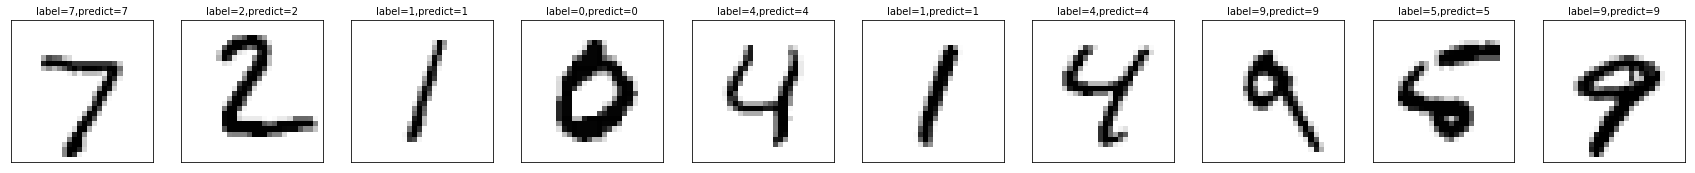

In [113]:
print(prediction[:10])
plot_images_labels_prediction(x_testraw,y_testraw,prediction,10)

In [50]:
import pandas as pd
pd.crosstab(y_testraw,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1129,3,1,0,0,1,1,0,0
2,0,0,1029,0,0,0,0,2,1,0
3,0,0,3,994,0,9,0,2,2,0
4,0,0,1,0,974,0,1,1,0,5
5,1,0,0,3,0,884,2,1,0,1
6,5,2,0,0,2,4,944,0,1,0
7,0,2,7,2,0,0,0,1014,1,2
8,4,0,3,1,1,3,1,2,954,5


In [51]:
df = pd.DataFrame({'label':y_testraw, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]
df[(df.label==5)&(df.predict==3)].index

Int64Index([1393, 2597, 3100], dtype='int64')

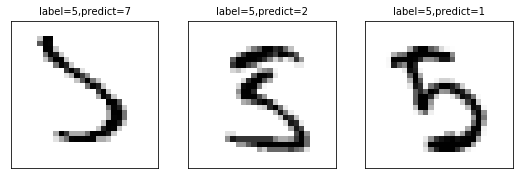

In [55]:
plot_images_labels_prediction([x_testraw[i] for i in df[(df.label==5)&(df.predict==3)].index]
                              ,[y_testraw[i] for i in df[(df.label==5)&(df.predict==3)].index],
                              prediction,3)

In [104]:
model3  = Sequential()

model3.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=36,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.25))

# 平坦化
model3.add(Flatten())
#隱藏層
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation = (tf.nn.softmax)))

In [105]:
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history=model3.fit(x=x_train, y=y_train,validation_split=0.2,
                        epochs=5, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 27s - loss: 0.5698 - acc: 0.8222 - val_loss: 0.1296 - val_acc: 0.9608
Epoch 2/5
 - 26s - loss: 0.1783 - acc: 0.9463 - val_loss: 0.0800 - val_acc: 0.9762
Epoch 3/5
 - 28s - loss: 0.1264 - acc: 0.9620 - val_loss: 0.0660 - val_acc: 0.9815
Epoch 4/5
 - 25s - loss: 0.1045 - acc: 0.9689 - val_loss: 0.0548 - val_acc: 0.9843
Epoch 5/5
 - 24s - loss: 0.0919 - acc: 0.9725 - val_loss: 0.0496 - val_acc: 0.9856


In [140]:
def firstcon(graph,modelt):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    for i in range(0, 8):
        ax=plt.subplot(1,8, 1+i)
        t1 = np.expand_dims(graph[i],axis=0) #change to 1 d
        cont1= modelt.predict(t1)
        printt1 = np.squeeze(cont1,axis=0)
        printt1 = printt1.reshape(printt1.shape[:2])
        ax.imshow(printt1, cmap='binary')
        ax.set_title("label=" +str(y_testraw[i]),fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])
    plt.show()

In [136]:
modelt = Sequential()
modelt.add(Conv2D(filters=1,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
modelt.add(MaxPooling2D(pool_size=(2,2)))
modelt.add(Conv2D(filters=1,kernel_size=(5,5),padding='same', activation='relu'))
modelt.add(MaxPooling2D(pool_size=(2,2)))
modelt.add(Dense(128, activation='relu'))

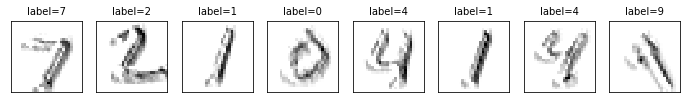

(28, 28)


In [124]:
firstcon(x_test,modelt) #relu

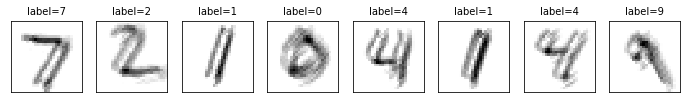

(28, 28)


In [126]:
firstcon(x_test,modelt)

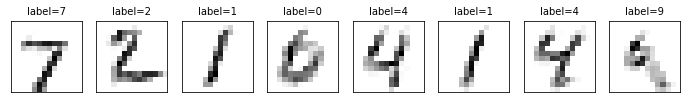

(14, 14)


In [128]:
firstcon(x_test,modelt)

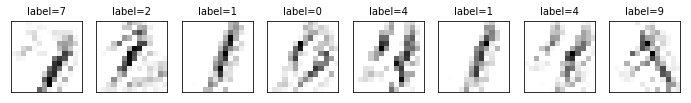

(14, 14)


In [130]:
firstcon(x_test,modelt)

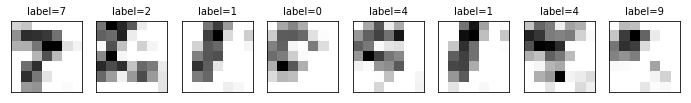

(7, 7)


In [132]:
firstcon(x_test,modelt)

In [133]:
print(modelt.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 1)         26        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 1)         26        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 1)           0         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


In [244]:
modelt2 = Sequential()
modelt2.add(Conv2D(filters=1,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='sigmoid'))
modelt2.add(MaxPooling2D(pool_size=(2,2)))

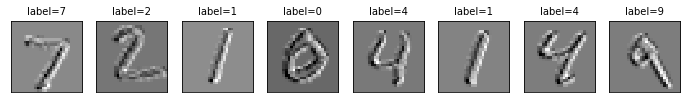

In [142]:
firstcon(x_test,modelt2) #sigmoid

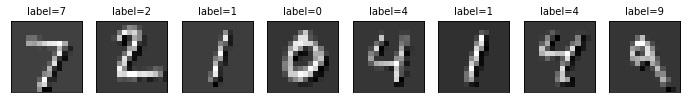

In [245]:
firstcon(x_test,modelt2)